# Exam 1

This activity is intended to assess your knowledge
in formulating engineering problems as univariate root-finding tasks,
as well as in applying relevant numerical methods to solve them.

## Scenario

Two batching plants -- Bonnie and Clyde --
have respective ratings of
$p_{1}$ kilowatts and $q_{2}$ kilovars,
have respective lagging power factors of
$\phi_{1}$ and $\phi_{2}$,
and
are separately served by dedicated feeders
whose respective impedances are
$r_{1} + j x_{1}$
and
$r_{2} + j x_{2}$ ohms.
The feeders branch out from a substation bus
regulated around a nominal voltage of $u$ kilovolts.

The main objective is to determine the phase-angle difference
between the rated operating voltages of Bonnie and of Clyde.
One way to accomplish the main objective is
to solve for the operating voltage magnitudes of Bonnie and of Clyde
(say, $v_{1}$ and $v_{2}$, respectively).
With such values,
determining the desired phase-angle difference
is a matter of analysis and complex-number arithmetic.

## Part II

This is the Programming component of the exam.

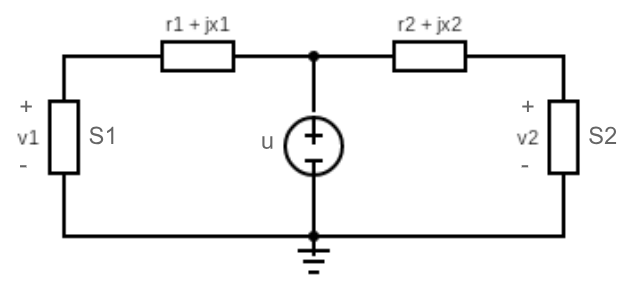

From part I the functions are:

$$f(v_1) = \left(\dfrac{v_1^{2} + P_1r_1 + x_1Q_1}{u}\right)^{2} + \left(\dfrac{ r_1Q_1 - P_1x_1}{u}\right)^{2} - v_1^{2}$$
$$g(v_2) = \left(\dfrac{v_2^{2} + P_2r_2 + x_2Q_2}{u}\right)^{2} + \left(\dfrac{ r_2Q_2 - P_2x_2}{u}\right)^{2} - v_2^{2}$$

First derivative,

$$f(v_1) = 4\left(\dfrac{v_1^{3} + (P_1r_1 + x_1Q_1)v_1}{u^{2}}\right)  - 2v_1$$
$$g(v_2) = 4\left(\dfrac{v_2^{3} + (P_2r_2 + x_2Q_2)v_2}{u^{2}}\right)  - 2v_2$$

Phase angle voltage:

$$ \phi_1 = tan^{-1}\left(\dfrac{r_1Q_1 - P_1x_1}{v_1^{2} + P_1x_1 + r_1Q_1}\right)
\; , \phi_2 = tan^{-1}\left(\dfrac{r_2Q_2 - P_2x_2}{v_2^{2} + P_2x_2 + r_2Q_2}\right)$$

Given parameters:
- $p_{1} = 450$ kV, $\phi_{1} = 0.87$, $q_{2} = 300$, kVAR and $\phi_{2} = 0.90$
- $r_{1} = 0.97$, $x_{1} = 2.45$, $r_{2} = 0.99$, and $x_{2} = 2.51$
- $u = 49.0$

where q_1 and p_2 are,

$q_1 = p_1tan(cos^{-1}(\phi_1)) = 255,026.753 \; vars$

$p_2 = \dfrac{q_2}{tan(cos^{-1}(\phi_2))} = 619,422.482 \; watts$

### Preliminaries

In [1]:
import math as mt

import scipy.optimize as spo

Define the following Python functions.
- `f()`, implementing $f\!\left(v\right)$
- `g()`, implementing $g\!\left(v\right)$
- `df()`, implementing the derivative of $f\!\left(v\right)$ w.r.t. $v$
- `dg()`, implementing the derivative of $g\!\left(v\right)$ w.r.t. $v$

Each of these functions should have the following inputs.
- `v`,
  a positional argument that represents the operating voltage
- `v_ss`,
  a keyword argument that represents the substation bus voltage
  and defaults to the nominal value

Lastly, define a Python function
`calc_angle_diff()` that returns the desired phase-angle difference
(in radians)
given two inputs:
- `v1`, the first positional argument representing $v_{1}$,
  and
- `v2`, the first positional argument representing $v_{2}$.

Replace the `pass` statements in the succeeding code cells.

In [2]:
u = 49

def v_ss(u):
    return u*0.9

In [3]:
def f(v):
    return ((v**2 + 1.061315544)/v_ss(u))**2 + (-0.85512405/v_ss(u))**2 - v**2

In [4]:
def g(v):
    return ((v**2 + 1.366228257)/v_ss(u))**2 + (-1.257750429/v_ss(u))**2 - v**2

In [5]:
def df(v):
    return 4*((v**3 + 1.061315544*v)/ v_ss(u)**2)  - 2*v1

In [6]:
def dg(v):
    return 4*((v**3 + 1.366228257*v)/ v_ss(u)**2)  - 2*v

In [7]:
def calc_angle_diff(v1,v2):
    return mt.atan(-0.85512405/(v1**2 + 1.061315544)) - mt.atan(-1.257750429/(v2**2 + 1.366228257))

### Using the bisection method

In solving for $v_{1}$,
define Python variables `_V1L` and `_V1U`
to store the lower and the upper ends of the search interval.
Similarly define Python variables `_V2L` and `_V2U`
in solving for $v_{2}$.

Run 
[`scipy.optimize.bisect()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
such that you get
the (approximate) root
as well as information concerning the run.
Store the (approximate) root and the information in Python variables

- `v1_bs` and `v1_bs_info`, respectively, for $v_{1}$; and
- `v2_bs` and `v2_bs_info`, respectively, for $v_{2}$.

Set tolerances and iteration budget to their corresponding default values.

Replace the `pass` statement in the succeeding cells with the appropriate code.

In [8]:
#An arbritrary value lower than v_ss(u) is chosen for _V1L.
_V1L, _V1U = 1, v_ss(u)

#An arbritrary value lower than v_ss is chosen for _V2L.
_V2L, _V2U = 1, v_ss(u)

v1_bs, v1_bs_info = spo.bisect(
    f, _V1L, _V1U,
    full_output = True, disp = False
)

v2_bs, v2_bs_info = spo.bisect(
    g, _V2L, _V2U,
    full_output = True, disp = False
)

In [9]:
print("-----")
print(v1_bs_info)
print("-----")
print(v2_bs_info)

-----
      converged: True
           flag: converged
 function_calls: 47
     iterations: 45
           root: 44.07591647029055
         method: bisect
-----
      converged: True
           flag: converged
 function_calls: 47
     iterations: 45
           root: 44.06898873131068
         method: bisect


In [10]:
print(f"Solving for Bonnie's operating voltage using the bisection method...")
print(f"\tinterval: {_V1L} - {_V1U} kilovolts")
print(f"\troot: {v1_bs} kilovolts")
print(f"\tresidual: {f(v1_bs)}")

Solving for Bonnie's operating voltage using the bisection method...
	interval: 1 - 44.1 kilovolts
	root: 44.07591647029055 kilovolts
	residual: 2.7057467377744615e-11


In [11]:
print(f"Solving for Clyde's operating voltage using the bisection method...")
print(f"\tinterval: {_V2L} - {_V2U} kilovolts")
print(f"\troot: {v2_bs} kilovolts")
print(f"\tresidual: {g(v2_bs)}")

Solving for Clyde's operating voltage using the bisection method...
	interval: 1 - 44.1 kilovolts
	root: 44.06898873131068 kilovolts
	residual: -1.0618350643198937e-10


In [12]:
v1 = v1_bs
v2 = v2_bs

print(f"Phase-angle difference: {calc_angle_diff(v1,v2)} radians")

Phase-angle difference: 0.00020724094770280987 radians


### Using the Newton-Raphson method

In solving for $v_{1}$,
define a Python variable `_V1NR`
to store the initial estimate.
Similarly define a Python variable `_V2NR`
in solving for $v_{2}$.

Run
[`scipy.optimize.newton()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
such that you get the (approximate) root as well as convergence information.
Store the (approximate) root and the information in Python variables

- `v1_nr` and `v1_nr_info`, respectively, for $v_{1}$; and
- `v2_nr` and `v2_nr_info`, respectively, for $v_{2}$.

Set tolerances and iteration budget to their corresponding default values.

Replace the `pass` statement in the succeeding cell with your code.

In [13]:
#_V1NR = 44  since it is closer to the root according to the previous method.
_V1NR = 44

#_V2NR = 44  since it is closer to the root according to the previous method.
_V2NR = 44

v1_nr, v1_nr_info = spo.newton(
    f, x0 = _V1NR, fprime = df,
    full_output = True, disp = False
)

v2_nr, v2_nr_info = spo.newton(
    g, x0 = _V2NR, fprime = dg,
    full_output = True, disp = False
)

In [14]:
print("-----")
print(v1_nr_info)
print("-----")
print(v2_nr_info)

-----
      converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 44.075916470290245
         method: newton
-----
      converged: True
           flag: converged
 function_calls: 6
     iterations: 3
           root: 44.06898873131188
         method: newton


In [15]:
print(f"Solving for Bonnie's operating voltage using the Newton-Raphson method...")
print(f"\tstart: {_V1NR} kilovolts")
print(f"\troot: {v1_nr} kilovolts")
print(f"\tresidual: {f(v1_nr)}")

Solving for Bonnie's operating voltage using the Newton-Raphson method...
	start: 44 kilovolts
	root: 44.075916470290245 kilovolts
	residual: -2.2737367544323206e-13


In [16]:
print(f"Solving for Clyde's operating voltage using the bisection method...")
print(f"\tstart: {_V2NR} kilovolts")
print(f"\troot: {v2_nr} kilovolts")
print(f"\tresidual: {g(v2_nr)}")

Solving for Clyde's operating voltage using the bisection method...
	start: 44 kilovolts
	root: 44.06898873131188 kilovolts
	residual: -2.2737367544323206e-13


In [17]:
v1 = v1_nr
v2 = v2_nr

print(f"Phase-angle difference: {calc_angle_diff(v1, v2)} radians")

Phase-angle difference: 0.0002072409477027685 radians


### Using the secant method

In solving for $v_{1}$,
define a Python variable `_V1SC`
to store the initial estimate.
Similarly define a Python variable `_V2SC`
in solving for $v_{2}$.

Run
[`scipy.optimize.newton()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
such that you get the (approximate) root as well as information concerning the run.
Store the (approximate) root and the information in Python variables

- `v1_sc` and `v1_sc_info`, respectively, for $v_{1}$; and
- `v2_sc` and `v2_sc_info`, respectively, for $v_{2}$.

Set tolerances and iteration budget to their corresponding default values.

Replace the `pass` statement in the succeeding cell with your code.

In [18]:
#_V1SC = 44  since it is closer to the root according to the previous method.
_V1SC = 44

#_V2SC = 44  since it is closer to the root according to the previous method.
_V2SC = 44

v1_sc, v1_sc_info = spo.newton(
    f, x0 = _V1SC,
    full_output = True, disp = False,
)

v2_sc, v2_sc_info = spo.newton(
    g, x0 = _V2SC,
    full_output = True, disp = False,
)

In [19]:
print("-----")
print(v1_sc_info)
print("-----")
print(v2_sc_info)

-----
      converged: True
           flag: converged
 function_calls: 5
     iterations: 4
           root: 44.075916470290245
         method: secant
-----
      converged: True
           flag: converged
 function_calls: 5
     iterations: 4
           root: 44.06898873131189
         method: secant


In [20]:
print(f"Solving for Bonnie's operating voltage using the secant method...")
print(f"\tstart: {_V1SC} kilovolts")
print(f"\troot: {v1_sc} kilovolts")
print(f"\tresidual: {f(v1_sc)}")

Solving for Bonnie's operating voltage using the secant method...
	start: 44 kilovolts
	root: 44.075916470290245 kilovolts
	residual: -2.2737367544323206e-13


In [21]:
print(f"Solving for Clyde's operating voltage using the secant method...")
print(f"\tstart: {_V2SC} kilovolts")
print(f"\troot: {v2_sc} kilovolts")
print(f"\tresidual: {g(v2_sc)}")

Solving for Clyde's operating voltage using the secant method...
	start: 44 kilovolts
	root: 44.06898873131189 kilovolts
	residual: 2.2737367544323206e-13


In [22]:
v1 = v1_sc
v2 = v2_sc

print(f"Phase-angle difference: {calc_angle_diff(v1, v2)} radians")

Phase-angle difference: 0.00020724094770276829 radians


## Instructions and reminders

### Written exam component

Write your answers in white A4 papers.
Use one (1) inch for the top, left, right, and bottom margins.
Write only on one page of a sheet.
Staple the sheets at the upper-left corner of the pages.

Corresponding maximum marks for Questions 1 - 7 are as follows.
- thirty (30) points for each of Questions 1 and 2
- ten (10) points for Question 3
- five (5) points for each of Questions 4 - 7

Question 8 is a bonus worth three (3) points.

The use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, include a brief closing section
(titled "Declaration on the use of AI tools")
declaring which and how AI tools are used in your work,
or non-use thereof.

### Programming component

Do not use any library or module other than those in the imports cell.

In addition to replacing the `pass` statements,
you also need to fix some intentional errors.

For each method,
- getting the correct value of $v_{1}$ merits ten (10) points,
- getting the correct value of $v_{2}$ merits ten (10) points,
- getting the correct value of the phase-angle difference merits ten (10) points,
  and
- getting a reasonable residual merits two (2) points.

Meeting the above conditions and all instructions
further merits a point.
Each non-compliance to an instruction, however, means a deduction of two (2) points.
Thus, one may earn up to 100 points for the programming component,
as long as
- all instructions are met,
- all code cells run properly in succession,
  and
- all computed quantities are (acceptably) equal to those in a held-out answer key.

Download this notebook file,
and save with a filename following the pattern
`EXM-01_<section>_<ID number>`,
where the section is as reflected in your Google Classroom.
For example,
if your ID number is 2013-0024
and you are enrolled in the M34W12 class,
then your notebook should be named
`EXM-01_M34W12_2013-0024.ipynb`.
Submit your notebook via the classwork platform for Exam 1 in Google Classroom.
Submissions beyond the deadline will not be considered.

The use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, please include a brief statement
(in a private comment to this classwork)
declaring which and how AI tools are used in your work,
or non-use thereof.

*Last updated by Christian Cahig on 2025-10-22*